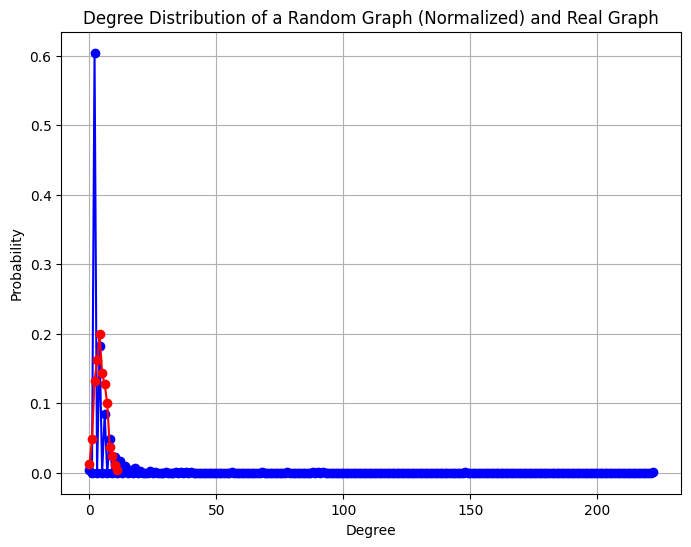

In [1]:
import csv
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

def read_edge_list(file_path):
    edges = []
    max_node_id = 0
    with open(file_path, 'r', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            if len(row) < 2:
                continue
            src = int(row[0])
            dst = int(row[1])
            max_node_id = max(max_node_id, src, dst)
            edges.append((src, dst))
    return edges, max_node_id

def compute_degree_distribution(edges, n):
    degrees = [0] * n
    for (u, v) in edges:
        degrees[u] += 1
        degrees[v] += 1
    max_degree = max(degrees)
    degree_freq = [0] * (max_degree + 1)
    for d in degrees:
        degree_freq[d] += 1
    degree_prob = [freq / n for freq in degree_freq]
    return degree_freq, degree_prob

def generate_gilbert_graph(n, p):
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                edges.append((i, j))
    return edges


def average_random_graph_degree_distribution(n, p, num_iterations=100):
    summed_freq = []
    total_nodes = n
    for _ in tqdm(range(num_iterations)):
        edges_rand = generate_gilbert_graph(n, p)
        deg_freq, _ = compute_degree_distribution(edges_rand, n)
        if len(deg_freq) > len(summed_freq):
            summed_freq.extend([0] * (len(deg_freq) - len(summed_freq)))
        for k in range(len(deg_freq)):
            summed_freq[k] += deg_freq[k]
    averaged_freq = [f / num_iterations for f in summed_freq]
    averaged_prob = [f / total_nodes for f in averaged_freq]
    return averaged_freq, averaged_prob

file_path = "Q1_Bio_Grid_Mouse.csv"
edges_real, max_node_id = read_edge_list(file_path)
n = max_node_id + 1
real_degree_freq, real_degree_prob = compute_degree_distribution(edges_real, n)
E_real = len(edges_real)
p = (2.0 * E_real) / (n * (n - 1))


edges_rand = generate_gilbert_graph(n, p)
rand_degree_freq, rand_degree_prob = compute_degree_distribution(edges_rand, n)
real_degrees = range(len(rand_degree_freq))
rand_degrees = range(len(real_degree_freq))
plt.figure(figsize=(8, 6))
plt.plot(range(len(real_degree_freq)), real_degree_prob, 'bo-', label="Real-World Graph")
plt.plot(range(len(rand_degree_freq)), rand_degree_prob, 'ro-', label="Single Gilbert Random Graph")
plt.title("Degree Distribution of a Random Graph (Normalized) and Real Graph")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.grid(True)
plt.savefig("Single_graph_degree_distribution_random.png")
plt.show()




  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:17<00:00,  5.87it/s]


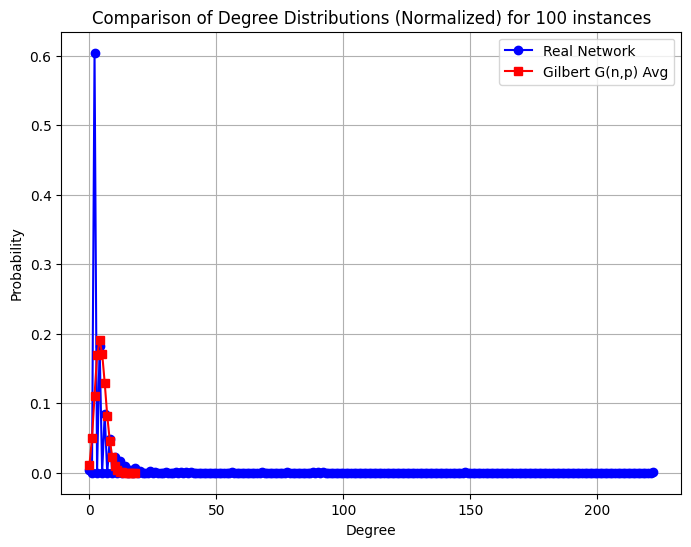

In [2]:
num_iterations = 100
rand_degree_freq_avg, rand_degree_prob_avg = average_random_graph_degree_distribution(n, p, num_iterations)

degrees_real_range = range(len(real_degree_freq))
degrees_rand_range = range(len(rand_degree_freq_avg))

plt.figure(figsize=(8, 6))
plt.plot(degrees_real_range, real_degree_prob, 'o-', color='blue', label='Real Network')
plt.plot(degrees_rand_range, rand_degree_prob_avg, 's-', color='red', label='Gilbert G(n,p) Avg')
plt.title("Comparison of Degree Distributions (Normalized) for 100 instances")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.savefig("100_degree_distribution_comparison.png")
plt.show()


COMPARISON:

The real-world network exhibits a skewed degree distribution, with many low-degree nodes and a few high-degree hubs, indicating a potential scale-free structure. In contrast, the Gilbert random graph follows a binomial distribution, where most nodes have similar degrees, lacking highly connected hubs. This suggests that the real-world network is not purely random but follows a more complex topology